In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Membaca data.csv
data_crim = pd.read_csv('/Users/fajri/Downloads/london_crime_by_lsoa 3.csv')
print('Dataset read into a pandas dataframe')

Dataset read into a pandas dataframe


In [3]:
data_crim.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [4]:
data_crim.shape

(13490604, 7)

In [5]:
# Mengganti Kolom borough -> Area
data_crim.rename(columns={'borough': 'Area'},inplace=True)

In [6]:
data_crim.head()

,lsoa_code,Area,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# Line Plot
### Jumlah Kejadian Berdasarkan Tahun

In [7]:
# Menjumlahkan dan menampilkan data/kejadian per Tahubn
total_per_year = data_crim.groupby(['year'])['value'].sum()

In [8]:
total_per_year

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

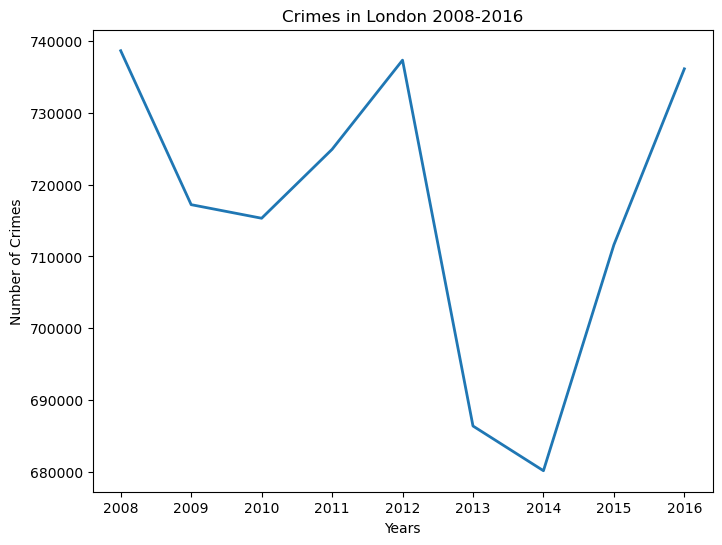

In [9]:
# line plot jumlah kejadian berdasarkan tahun
# figsize untuk merubah ukuran
# color untuk merubah warna garis
# linewidth untuk merubah ketebalan garis
total_per_year.plot(kind='line', figsize=(8,6), linewidth='2')
plt.title('Crimes in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show()

Dari data diatas dapat kita dapat mengetahui jumlah frekuensi total kasus yang mempunyai value = 1 / Abounding pertahun. Jadi dapat disimpulkan bahwa jumlah kasus tertinggi berada di tahun 2008 yaitu sebanyak 738641 kausus. Dan kasus terendah berada di tahun 2014 dengan jumlah kasus yaitu 680183

## Jumlah Kejadian Major Kategori Berdasarkan Tahun
Berikutnya adalah melihat tingkat kejadian berdasarkan **major category** per tahun

In [10]:
# Deklerasi data dengan mengelompokkan data berdasarkan major cateogry dengan jumlah kasus pertahun
data_by_year_category = data_crim.groupby(['year', 'major_category'])['value'].sum().reset_index()

In [11]:
data_by_year_category

,year,major_category,value
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112
...,...,...,...
76,2016,Other Notifiable Offences,15809
77,2016,Robbery,22528
78,2016,Sexual Offences,0
79,2016,Theft and Handling,294133


In [12]:
# Mengubah column di dataset
df_pivot = data_by_year_category.pivot(index='year', columns='major_category', values='value')

In [13]:
# Menghapus nilai yang Null
df_pivot.dropna(inplace=True)

In [14]:
df_pivot

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


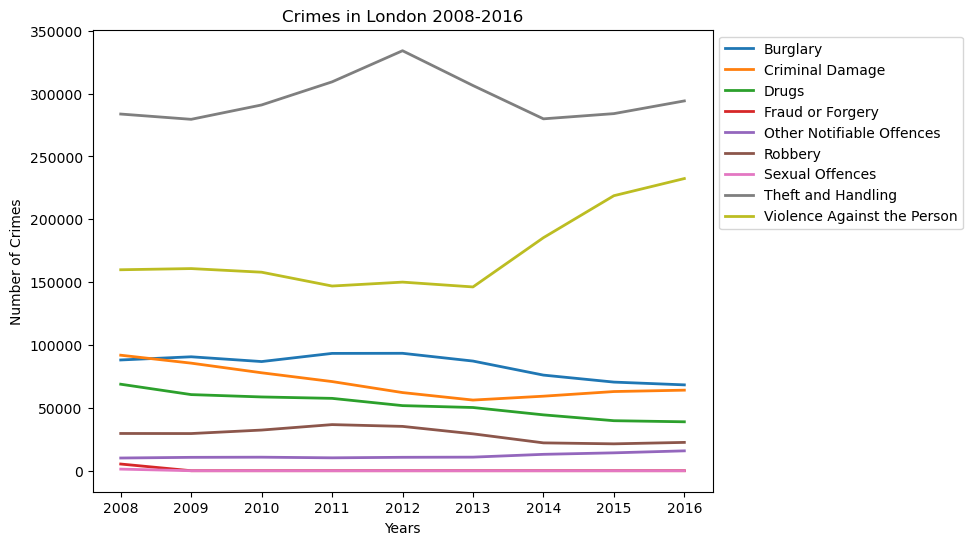

In [15]:
# Plotting Data Crimes di london berdasarkan major category pertahun
df_pivot.plot(kind='line', figsize=(8,6), linewidth='2')
plt.title('Crimes in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.legend(labels=df_pivot.columns, bbox_to_anchor=(1, 1))
           
plt.show()

Dari data diatas dapat kita ketahui pergerakan jumlah kasus berdasarkan major category pertahun. Dan kasus yang tertinggi adalah Theft and Handling

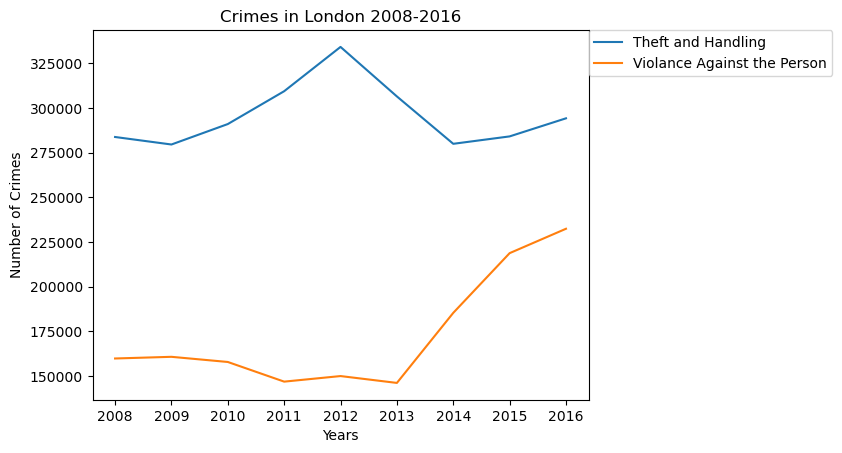

In [16]:
# Plotting data khusus untuk major category Theft and Handling dan Violance Against the Persson
df_pivot['Theft and Handling'].plot(label= 'Theft and Handling')
df_pivot['Violence Against the Person'].plot(label= 'Violance Against the Person')
plt.title('Crimes in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

# Atur posisi legenda ke kanan atas (di luar grafik) dan tambahkan jarak dengan bbox_to_anchor dan borderaxespad
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

plt.show()


# Pie Chart

### 1. Based on Major Category
Membuat Pie Chart untuk merepresentasikan jumlah dari setiap major category

In [17]:
# Mengumpulkan dan menjumlahkan data
total_per_category = data_crim.groupby('major_category')['value'].sum()

In [18]:
# Mengurutkan data dari yang terbesar ke yang terkecil
total_per_category.sort_values(ascending=False, axis=0)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

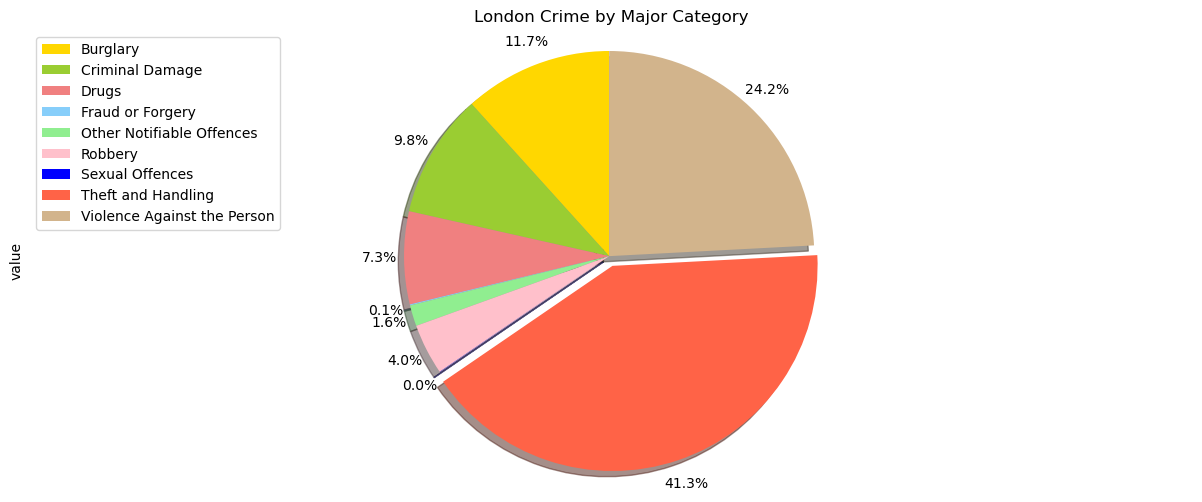

In [19]:
# Ploting untuk Pie Chart dan mengatur warna, ukuran, tampilan, shadow dll
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'blue', 'tomato', 'tan']
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.05, 0]
total_per_category.plot(kind='pie',
                                 figsize=(15,6),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True,
                                 labels=None,
                                 pctdistance=1.12,
                                 colors=color_list,
                                 explode=explode_list
                                )
plt.title('London Crime by Major Category')
plt.axis('equal')
plt.legend(labels=total_per_category.index, loc='upper left')
plt.show()

Dari Chart di atas kita dapat menarik informasi berupa major category yang mendominasi tindakan kriminal di London yaitu kategori Theft and Handling sebesar 41.3% atau 2661861 kasus. dan major category terkecil yaitu Sexual Offences sebesar 0.1% atau  1273 selama periode 2008-2016

### 2. Based on Top 10 Area
Selanjutnya adalah membuat Pie Chart berdasarkan Top 10 area dengan jumlah kasus terbanyak. Dan kita akan cari tahu jumlah data berdasarkan area

In [20]:
# Menghitung banyak data
grouped_data = data_crim.groupby('Area')['value'].sum()

In [21]:
# Mengurutkan data dari hasil perhitungan sebelumnya
grouped_data.sort_values(ascending=False, axis=0, inplace=True)

In [22]:
grouped_data.head(10)

Area
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: value, dtype: int64

In [23]:
# Melihat data terkecil
grouped_data.tail()

Area
Bexley                  114136
Sutton                  100987
Richmond upon Thames     96771
Kingston upon Thames     89306
City of London             780
Name: value, dtype: int64

In [24]:
# Mengambil sebanyak 10 Area dengan jumlah kasus tertinggi
data_area10 = grouped_data.head(10).sort_values(ascending=False)

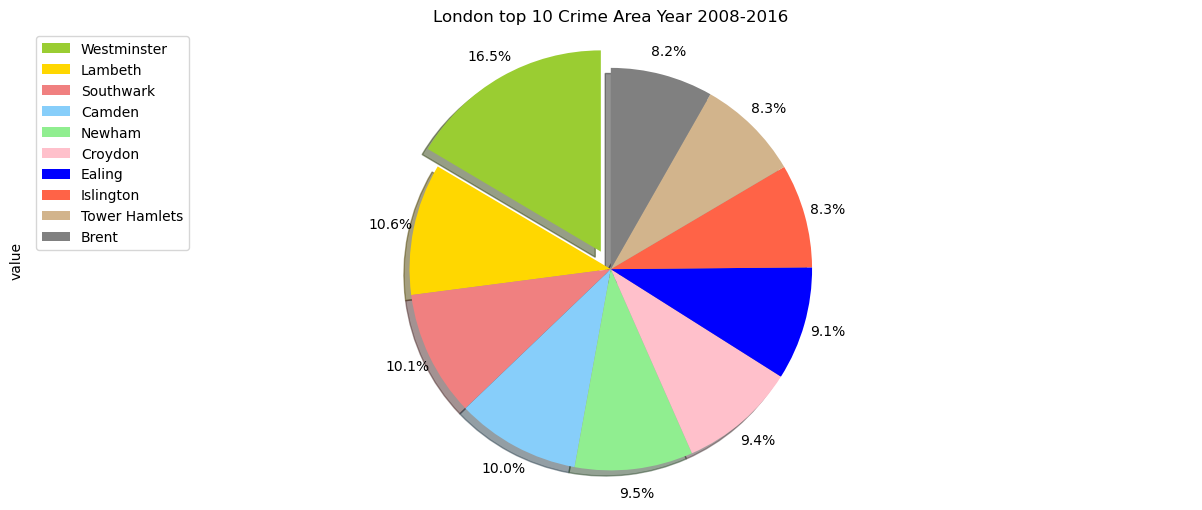

In [25]:
# Membuat plotting dan mengatur tampilan Pie Chart
color_list = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'blue', 'tomato', 'tan', 'grey']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data_area10.plot(kind='pie',
                                 figsize=(15,6),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True,
                                 labels=None,
                                 pctdistance=1.12,
                                 colors=color_list,
                                 explode=explode_list
                                )
plt.title('London top 10 Crime Area Year 2008-2016')
plt.axis('equal')
plt.legend(labels=data_area10.index, loc='upper left')
plt.show()

Dari data diatas kita dapat mengetahui area yang memiliki jumlah kasus terbanyak di London yaitu Westminster dengan jumlah kasus sebanyak 455028

### 3. Area of Most Category : Burglary	
Selanjutnya adalah membuat Pie Chart untuk mengetahui dimana saja kasus dengan major category Burglary terjadi. 

In [26]:
# Membaca Data Burglary di kolomn major category
b_area = data_crim['major_category'] == 'Burglary' 

In [27]:
print(b_area.head(10))

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: major_category, dtype: bool


In [28]:
# Deklarasi variabel berdasarkan nilai atau value dari dataset yang sudah diatur
b_area = data_crim[b_area]

In [29]:
# Menjumlahkan data dari dataset Burglary
most_category_area = b_area.groupby('Area')['value'].sum()

In [30]:
# Mengurutkan data dari yang tertinggi ke yang terendah
most_category_area.sort_values(ascending=False, axis=0, inplace=True)

In [31]:
b_area = most_category_area.head(10)

In [32]:
b_area

Area
Barnet         36981
Croydon        33376
Ealing         30831
Enfield        30213
Lambeth        30199
Westminster    29295
Brent          28923
Haringey       28213
Southwark      27980
Camden         27939
Name: value, dtype: int64

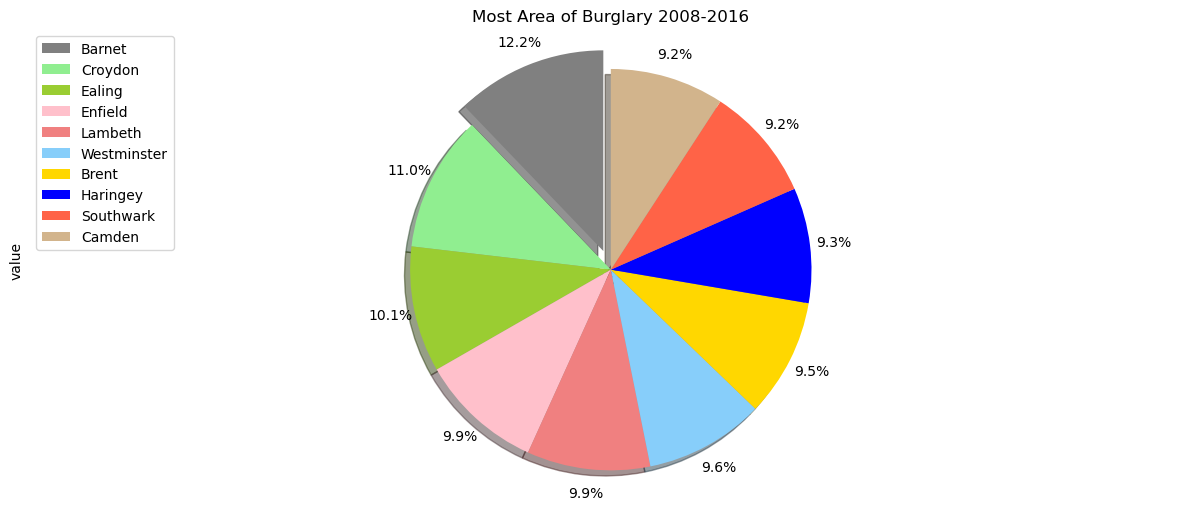

In [33]:
# Plotting Pie Chart untuk lokasi terjadinya Burglary terbanyak
color_list = ['grey','lightgreen', 'yellowgreen','pink', 'lightcoral', 'lightskyblue','gold', 'blue', 'tomato', 'tan']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b_area.plot(kind='pie',
                                 figsize=(15,6),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True,
                                 labels=None,
                                 pctdistance=1.12,
                                 colors=color_list,
                                 explode=explode_list
                                )
plt.title('Most Area of Burglary 2008-2016')
plt.axis('equal')
plt.legend(b_area.index, loc='upper left')
plt.show()

Data wilayah dengan kasus Burglary terbanyak yaitu Barnet

# Area Plot
### Top 10 Area
Kali ini saya akan memvisualisasikan 10 data area tertinggi terjadinya kasus yang telah diolah menggunakan Area Plot

In [34]:
area = data_crim.groupby(['Area', 'year'])['value'].sum().reset_index()

In [35]:
area_pivot = area.pivot(index='Area', columns='year', values='value')

In [36]:
area_pivot['total'] = area_pivot.sum(axis=1)

In [37]:
area_pivot.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Area,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [38]:
data_area = area_pivot.sort_values(by='total', ascending=False)

In [39]:
data_area.drop(columns='total', inplace=True)

In [40]:
data_area = data_area.head(10)

In [41]:
data_area = data_area.transpose()

In [42]:
data_area

Area,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,Brent
year,,,,,,,,,,
2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,23504
2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,24748
2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,25512
2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,27669
2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,26357
2013,53852,31868,31128,28435,27577,27444,25917,23784,26258,23759
2014,47564,31765,28912,27198,28005,27357,24978,24679,25504,24426
2015,47395,33164,30260,29477,29217,28089,26247,27032,27493,24883
2016,48330,34071,31636,29183,30090,28712,27127,27092,29253,26693


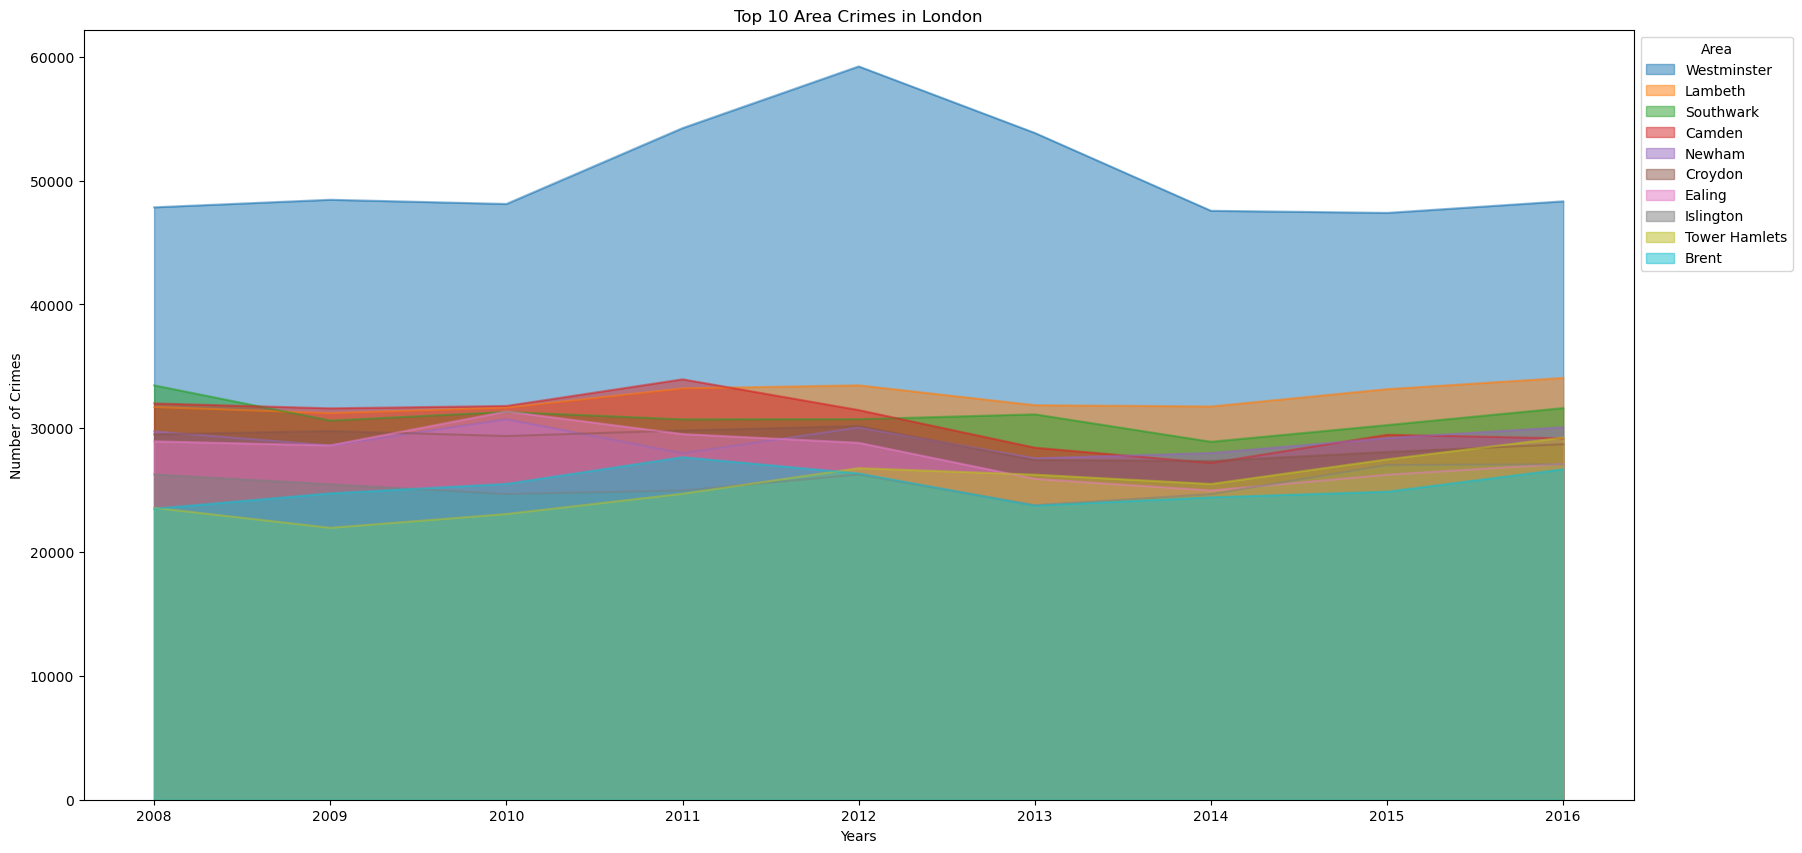

In [43]:
data_area.index = data_area.index.map(int)
data_area.plot(kind='area',
            stacked=False,
            figsize=(20,10),
                )
plt.title('Top 10 Area Crimes in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.legend(title='Area',bbox_to_anchor=(1, 1))
plt.show()

Data diatas merupakan area dengan kasus terbanyak

In [44]:
data_major = data_crim.groupby(['year', 'major_category'])['value'].sum().reset_index()

In [45]:
data_major.head()

,year,major_category,value
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112


In [46]:
data_major = data_major.pivot(index='major_category', columns='year', values='value')

In [47]:
data_major['totals'] = data_major.sum(axis=1)

In [48]:
sorted_df = data_major.sort_values(by='totals', ascending=False)

In [49]:
sorted_df = sorted_df.drop(columns=['totals'])

In [50]:
sorted_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Sexual Offences,1273,0,0,0,0,0,0,0,0


In [51]:
data_sort_transpose = sorted_df.transpose()

In [52]:
data_sort_transpose

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs,Robbery,Other Notifiable Offences,Fraud or Forgery,Sexual Offences
year,,,,,,,,,
2008,283692,159844,88092,91872,68804,29627,10112,5325,1273
2009,279492,160777,90619,85565,60549,29568,10644,0,0
2010,290924,157894,86826,77897,58674,32341,10768,0,0
2011,309292,146901,93315,70914,57550,36679,10264,0,0
2012,334054,150014,93392,62158,51776,35260,10675,0,0
2013,306372,146181,87222,56206,50278,29337,10811,0,0
2014,279880,185349,76053,59279,44435,22150,13037,0,0
2015,284022,218740,70489,62976,39785,21383,14229,0,0
2016,294133,232381,68285,64071,38914,22528,15809,0,0


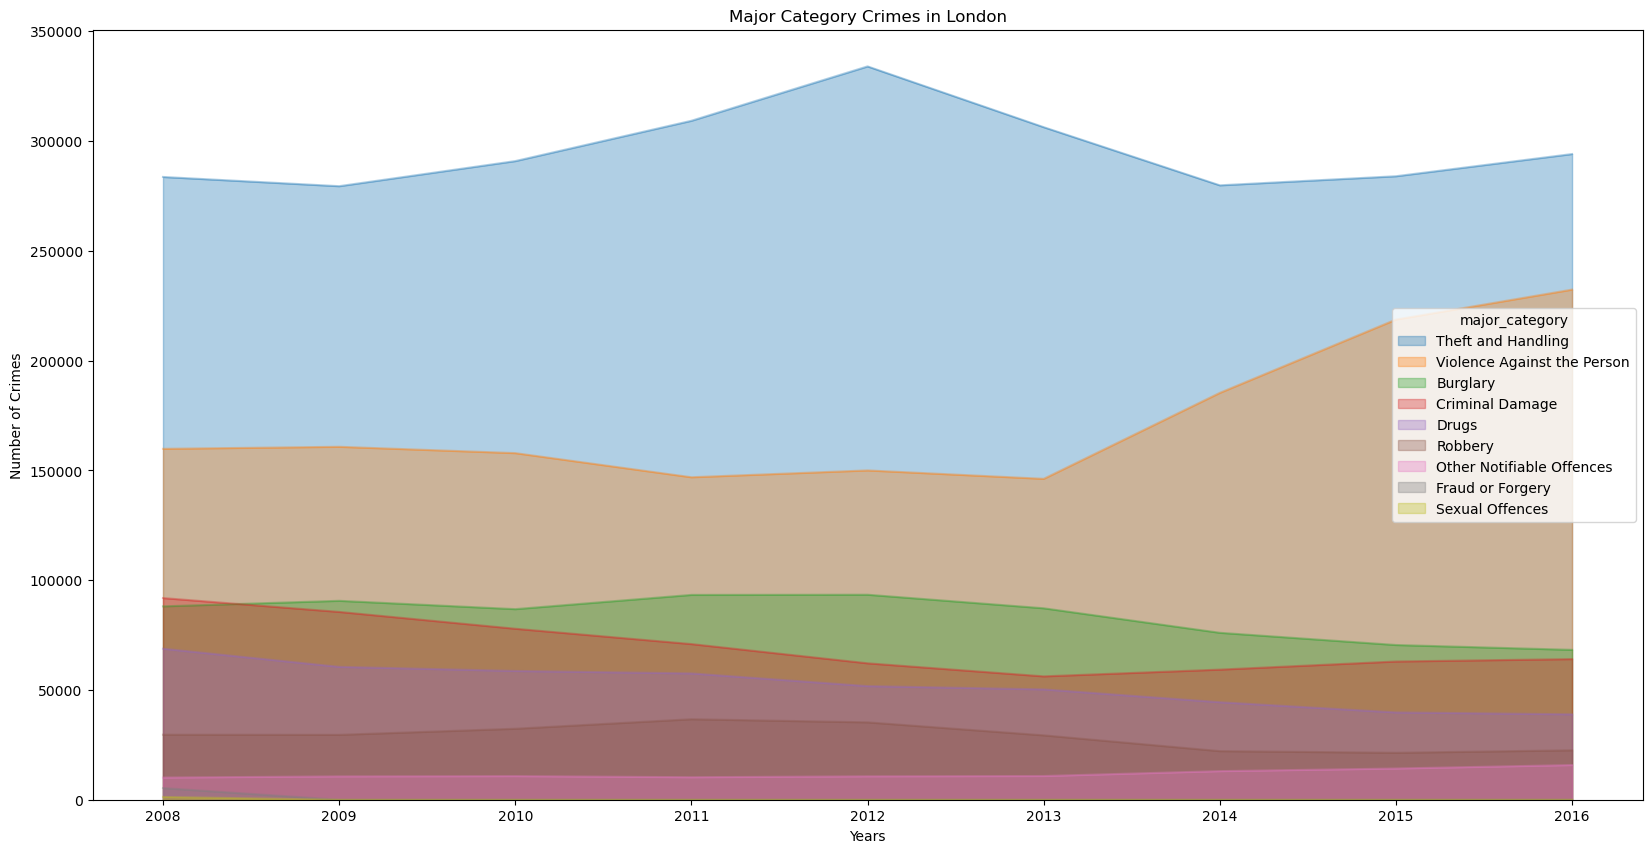

In [53]:
data_sort_transpose.index = data_sort_transpose.index.map(int)
data_sort_transpose.plot(kind='area',
                         alpha=0.35,
                         stacked=False,
                         figsize=(20,10),
                        )
plt.title('Major Category Crimes in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show()

# Bar Chart
### Bar Chart of Top 10 Crime Area in London

In [54]:
data_area_new = data_area.transpose()

In [55]:
data_area_new.sort_index(ascending=True, inplace=True)

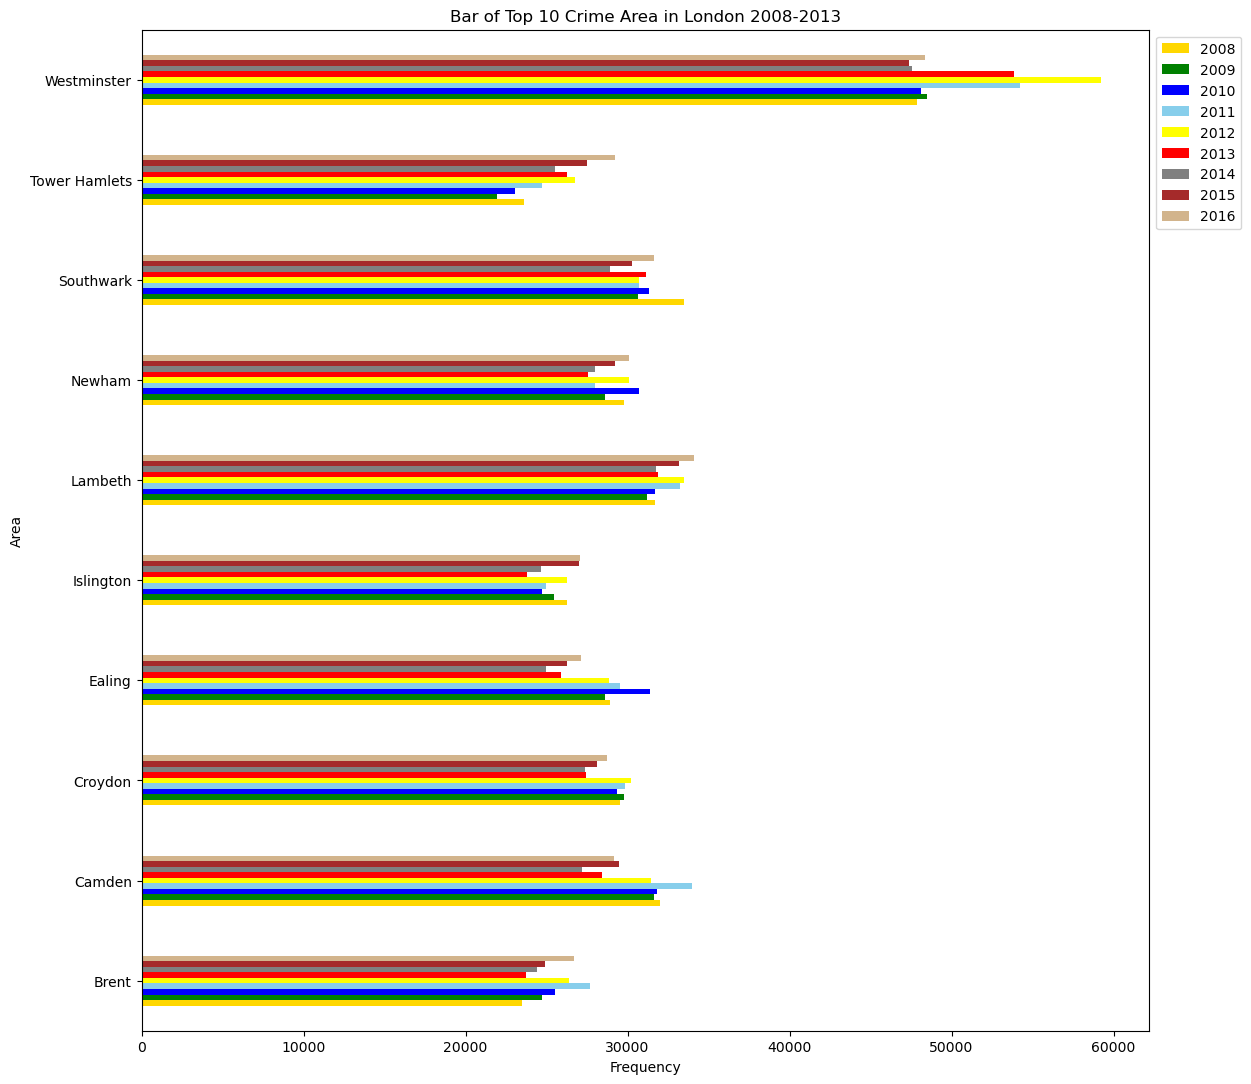

In [56]:
data_area_new.plot(kind='barh', figsize=(13,13), color = ['gold', 'green', 'blue', 'skyblue', 'yellow', 'red', 'grey', 'brown', 'tan'])
plt.title('Bar of Top 10 Crime Area in London 2008-2013')
plt.xlabel('Frequency')
plt.ylabel('Area')
plt.legend(labels=data_area_new.columns, bbox_to_anchor=(1, 1))
           

Dari data di atas kita dapat mengeahui jumlah area dengan kasus terbanyak yaitu "Westminster" pada tahn 2012 dengan jumlah kasus yaitu 59226

In [57]:
total_per_category

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

Text(0, 0.5, 'Area')

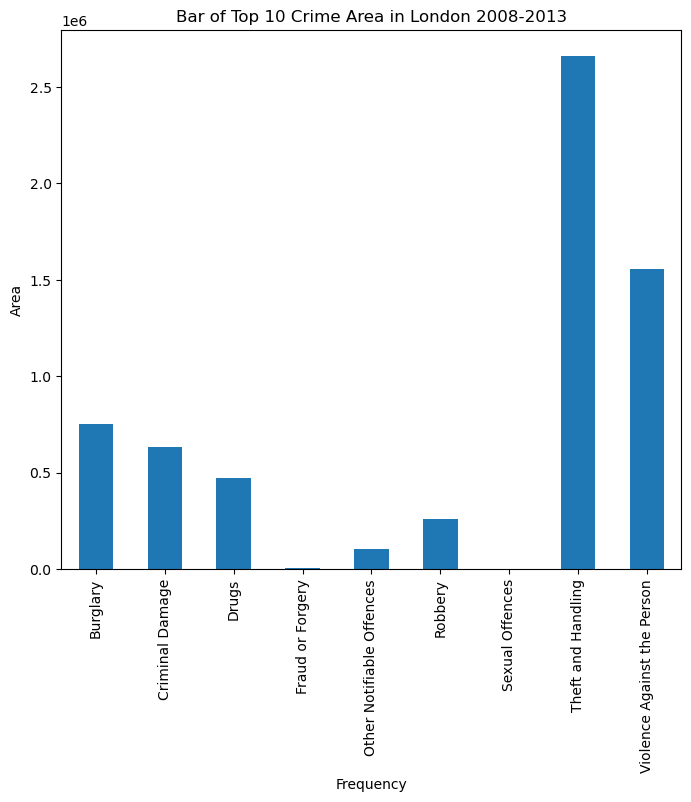

In [58]:
total_per_category.plot(kind='bar', figsize=(8,7))
plt.title('Bar of Top 10 Crime Area in London 2008-2013')
plt.xlabel('Frequency')
plt.ylabel('Area')
           

### Bar Plots Data Crimes(Theft and Handling) Based on Year

In [59]:
theft_per_year = data_crim[data_crim['major_category'] == 'Theft and Handling'].groupby('year')['value'].sum()

In [60]:
theft_per_year

year
2008    283692
2009    279492
2010    290924
2011    309292
2012    334054
2013    306372
2014    279880
2015    284022
2016    294133
Name: value, dtype: int64

Text(1.3, 296000, 'Theft and Handling Cases')

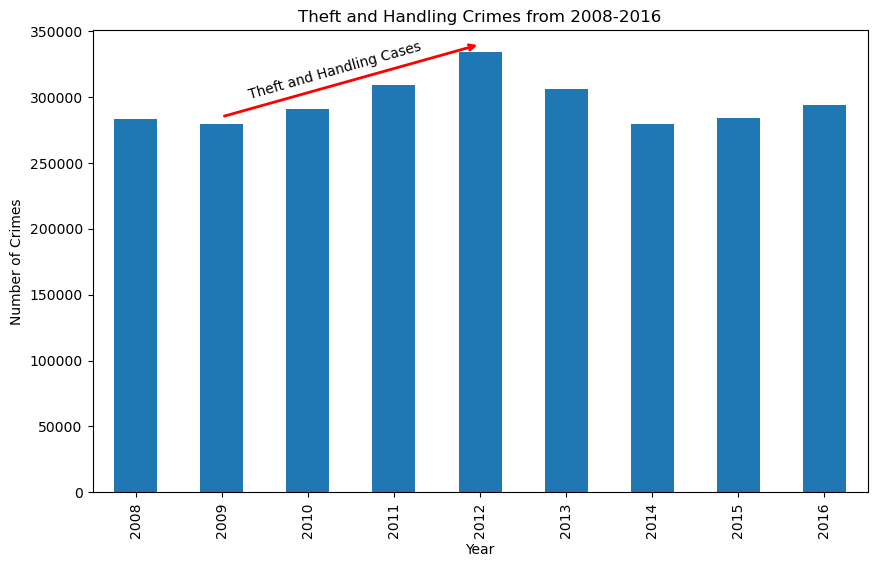

In [61]:
theft_per_year.plot(kind= 'bar', figsize=(10,6), rot=90)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Theft and Handling Crimes from 2008-2016')

# Annotate arrow
plt.annotate('', xy=(4,340000), 
            xytext=(1, 285000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
# Annotate Text
plt.annotate('Theft and Handling Cases',
            xy=(1.3, 296000),
            rotation=15.9,
            va='bottom',
            ha='left',
            )

# Histogram

In [62]:
data_sort_transpose

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs,Robbery,Other Notifiable Offences,Fraud or Forgery,Sexual Offences
year,,,,,,,,,
2008,283692,159844,88092,91872,68804,29627,10112,5325,1273
2009,279492,160777,90619,85565,60549,29568,10644,0,0
2010,290924,157894,86826,77897,58674,32341,10768,0,0
2011,309292,146901,93315,70914,57550,36679,10264,0,0
2012,334054,150014,93392,62158,51776,35260,10675,0,0
2013,306372,146181,87222,56206,50278,29337,10811,0,0
2014,279880,185349,76053,59279,44435,22150,13037,0,0
2015,284022,218740,70489,62976,39785,21383,14229,0,0
2016,294133,232381,68285,64071,38914,22528,15809,0,0


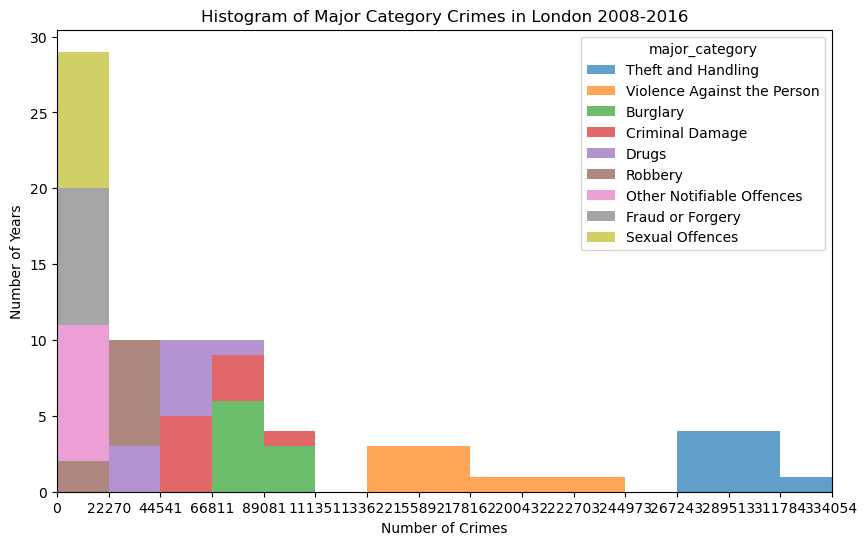

In [63]:
count, bin_edges = np.histogram(data_sort_transpose, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
data_sort_transpose.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.7,
         xticks=bin_edges,
         stacked=True,
         xlim=(xmin, xmax)
         )
plt.title('Histogram of Major Category Crimes in London 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')


plt.show()

# Box Plots
Box Plot adalah cara untuk statistik merepresentasikan distribusi data melalui lima dimensi utama:
 - Minimum : Smallest number in dataset
 - First quartile : Middle number between minimum and median.
 - Second quartile (Median) : Middle number of the (sorted) dataset.
 - Third quartile: Middle number between median and maximum.
 - Maximum : Highest number in the dataset
 
 ## Box Plots Theft and Handling

In [64]:
df_theft = sorted_df.loc[['Theft and Handling']]

In [65]:
df_theft = df_theft.transpose()

In [66]:
df_theft

major_category,Theft and Handling
year,
2008,283692
2009,279492
2010,290924
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [67]:
df_theft.describe()

major_category,Theft and Handling
count,9.000000
mean,295762.333333
std,17987.611959
min,279492.000000
25%,283692.000000
50%,290924.000000
75%,306372.000000
max,334054.000000


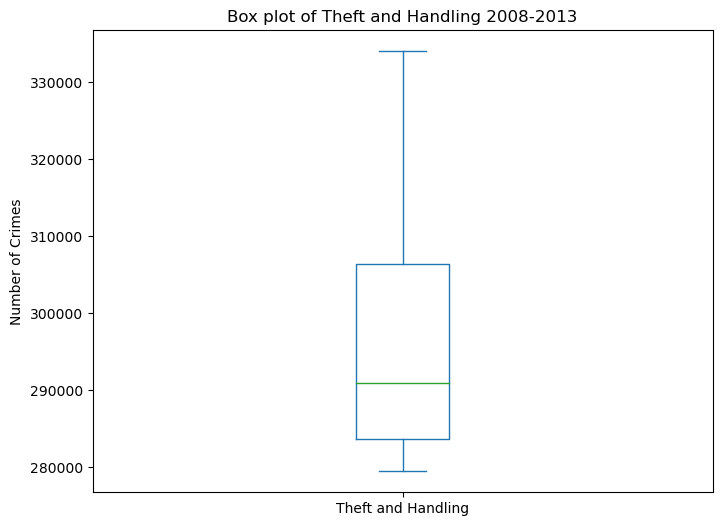

In [68]:
df_theft.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Theft and Handling 2008-2013')
plt.ylabel('Number of Crimes')
plt.show()

### Box Plots Theft and Handling & Violence Against the Person

In [69]:
df_TV = sorted_df.loc[['Theft and Handling', 'Violence Against the Person']]

In [70]:
df_TV = df_TV.transpose()

In [71]:
df_TV.describe()

major_category,Theft and Handling,Violence Against the Person
count,9.000000,9.000000
mean,295762.333333,173120.111111
std,17987.611959,32113.207526
min,279492.000000,146181.000000
25%,283692.000000,150014.000000
50%,290924.000000,159844.000000
75%,306372.000000,185349.000000
max,334054.000000,232381.000000


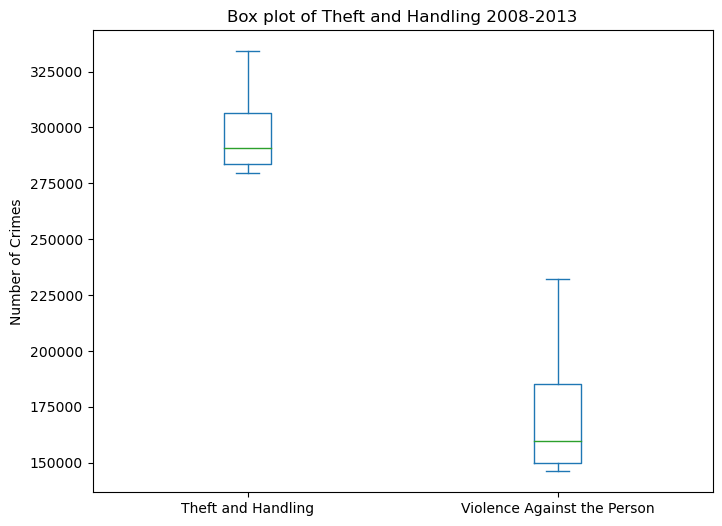

In [72]:
df_TV.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Theft and Handling 2008-2013')
plt.ylabel('Number of Crimes')
plt.show()

### Horizontal Box Plots

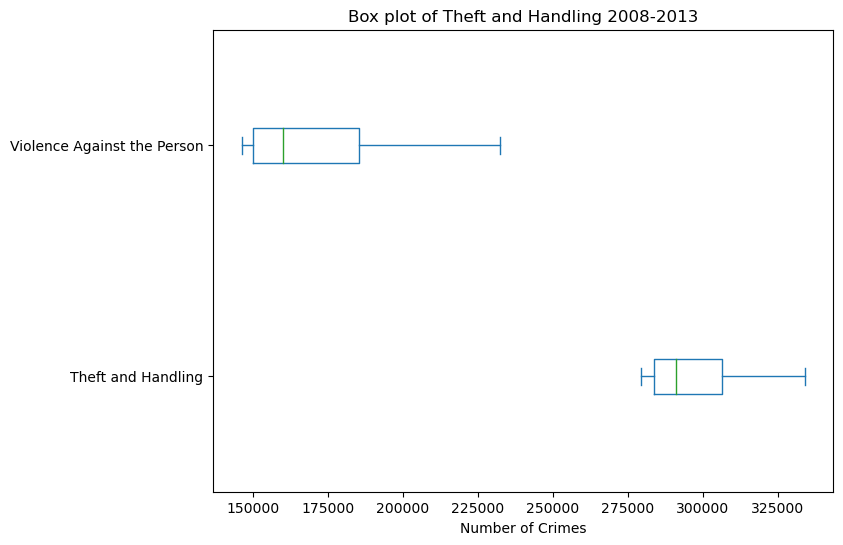

In [73]:
df_TV.plot(kind='box', figsize=(8,6), vert=False)
plt.title('Box plot of Theft and Handling 2008-2013')
plt.xlabel('Number of Crimes')
plt.show()

### Subplots

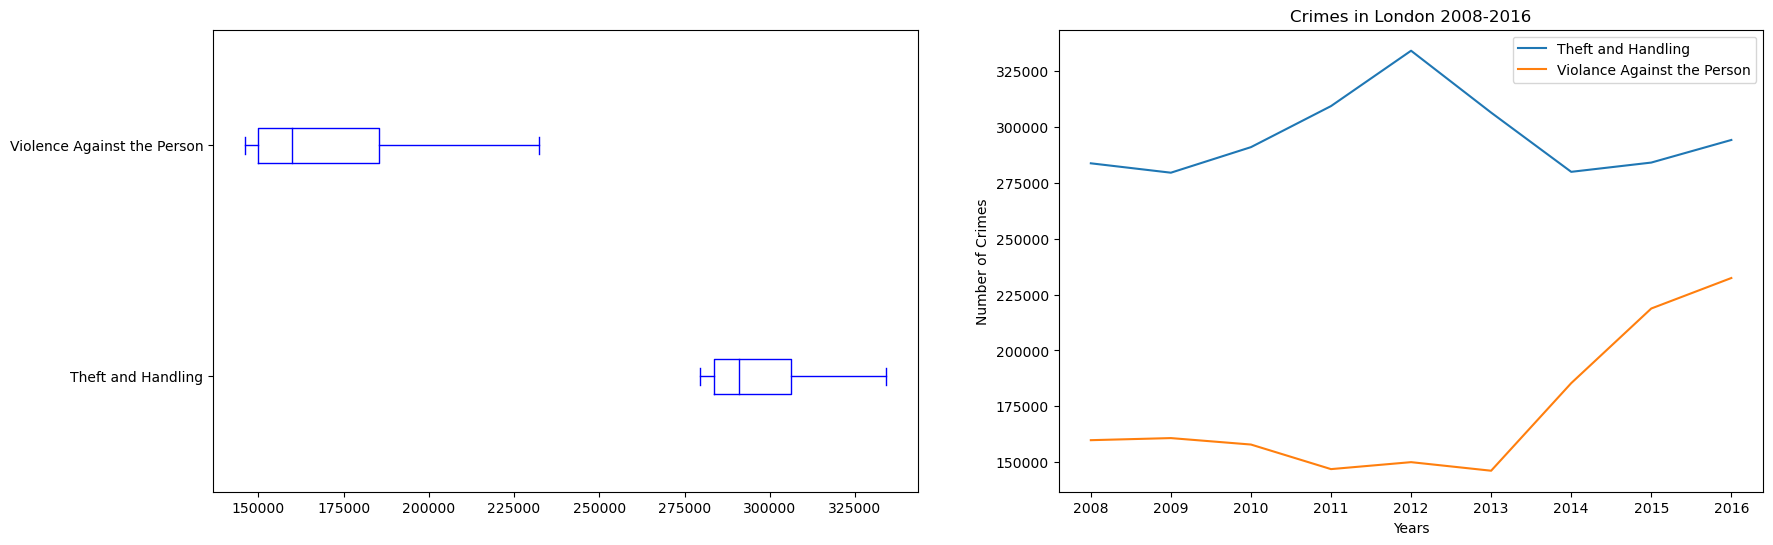

In [74]:
fig = plt.figure() # Create figure
ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot)
# Subplot 1: Box plot
df_TV.plot(kind='box', color='blue',vert=False, figsize=(20,6), ax=ax0)
# add to subplot 1
plt.title('Box plot of Theft and Handling 2008-2013')
plt.xlabel('Number of Crimes')

# Subplot 2: Line Plot
df_pivot['Theft and Handling'].plot(label= 'Theft and Handling')
df_pivot['Violence Against the Person'].plot(label= 'Violance Against the Person') # Add to subplot 2
plt.title('Crimes in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Scatter Plots
Scatter plot(2D) adalah metode yang berguna untuk membandingkan variabel satu sama lain.

In [75]:
ds_scater = total_per_year.reset_index()

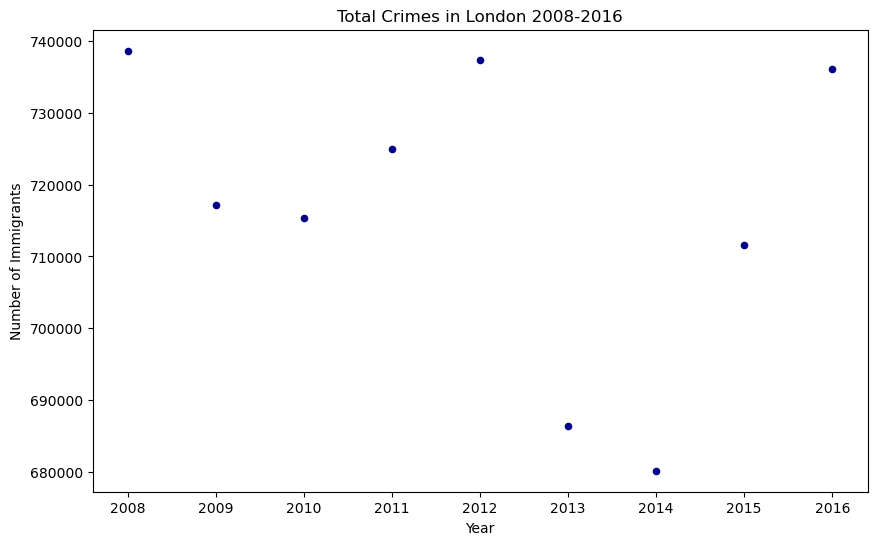

In [76]:
ds_scater.plot(kind='scatter', x='year', y='value', figsize=(10,6), color='darkblue')
plt.title('Total Crimes in London 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

# Word Clouds

In [77]:
from wordcloud import WordCloud, STOPWORDS

In [78]:
data_minor = data_crim.groupby('minor_category')['value'].sum().reset_index()

In [79]:
data_minor.set_index('minor_category')

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


In [80]:
data_minor = data_minor.sort_values(by='value',ascending=False)

In [81]:
# Menggabungkan semua nilai dalam kolom "minor_category" menjadi satu string, dipisahkan oleh koma
minor_category_string = ', '.join(data_minor['minor_category'])

In [82]:
minor_category_string

'Other Theft, Theft From Motor Vehicle, Burglary in a Dwelling, Harassment, Assault with Injury, Possession Of Drugs, Common Assault, Theft From Shops, Other Theft Person, Criminal Damage To Motor Vehicle, Burglary in Other Buildings, Personal Property, Theft/Taking Of Motor Vehicle, Theft/Taking of Pedal Cycle, Criminal Damage To Dwelling, Other Criminal Damage, Wounding/GBH, Other Notifiable, Other violence, Criminal Damage To Other Building, Motor Vehicle Interference & Tampering, Offensive Weapon, Drug Trafficking, Business Property, Handling Stolen Goods, Going Equipped, Counted per Victim, Other Drugs, Other Fraud & Forgery, Other Sexual, Murder, Rape'

In [83]:
stopwords = set(STOPWORDS)

In [84]:
word = WordCloud(
     background_color='Black',
     max_words=2000,
     stopwords=stopwords
)
word.generate(minor_category_string)

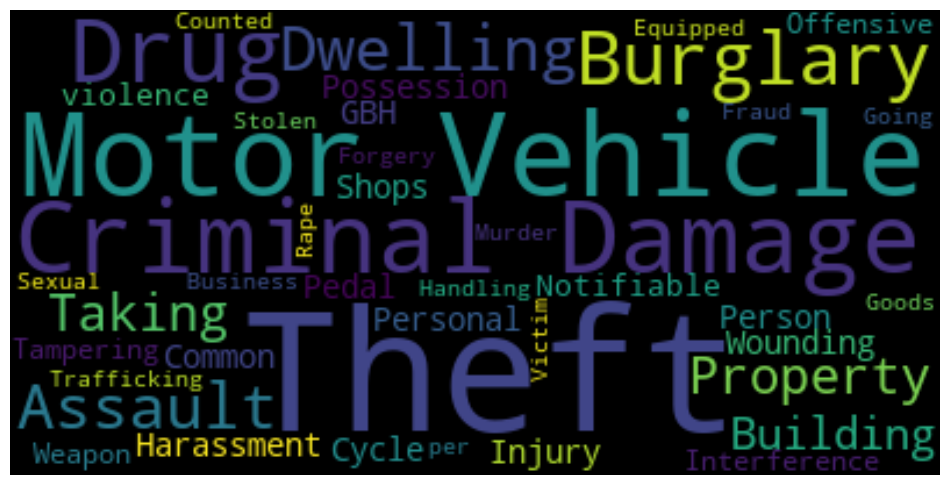

In [85]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(16)
plt.imshow(word, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium

In [86]:
data_lsoa = data_crim.groupby('lsoa_code')['value'].sum().reset_index()

In [87]:
data_lsoa

,lsoa_code,value
0,E01000001,35
1,E01000002,51
2,E01000003,31
3,E01000005,123
4,E01000006,835
...,...,...
4830,E01033742,277
4831,E01033743,1444
4832,E01033744,499
4833,E01033745,541


In [88]:
data_crim

,lsoa_code,Area,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [89]:
import folium
latitude = 51.509415564065826 
longitude = -0.12284589542672435

In [90]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [91]:
london_map

In [92]:
df2 = data_crim[['Area','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
m = folium.Map(location=[51.509415564065826 , -0.12284589542672435], zoom_start=11)
folium.Choropleth(
    geo_data=london_geo,
    data=df2,
    columns=["Area", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Crime rate in boroughs of London",
    highlight=True,
).add_to(m)

m